In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('amazon_sales_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Order ID,Date,Product,Category,Units Sold,Price,Revenue,Country,Rating
0,f4e2147a-899e-4948-b414-078c0bf104d5,2024-07-25,Vacuum Cleaner,Home,4,296.57,1186.28,India,1
1,cfca717b-3206-4956-ab35-ed62b3c8e1a3,2025-04-05,Lamp,Home,6,416.24,2497.44,India,5
2,d683eb86-2d17-4c39-a22c-65567715f66b,2024-11-07,Laptop,Electronics,4,254.92,1019.68,USA,2
3,2952d77c-1e5c-4436-9e19-e484b5227788,2025-04-04,T-Shirt,Clothing,7,273.63,1915.41,India,1
4,37963400-fa22-473b-ba3d-6599213e494c,2025-04-25,Smartwatch,Electronics,3,394.14,1182.42,India,5


In [2]:
# Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order ID    1000 non-null   object        
 1   Date        1000 non-null   datetime64[ns]
 2   Product     1000 non-null   object        
 3   Category    1000 non-null   object        
 4   Units Sold  1000 non-null   int64         
 5   Price       1000 non-null   float64       
 6   Revenue     1000 non-null   float64       
 7   Country     1000 non-null   object        
 8   Rating      1000 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 70.4+ KB


In [3]:
df.describe()

,Date,Units Sold,Price,Revenue,Rating
count,1000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2025-01-05 08:39:50.400000,5.581000,256.613580,1431.865440,3.080000
min,2024-07-07 00:00:00,1.000000,11.220000,20.830000,1.000000
25%,2024-09-30 00:00:00,3.000000,131.875000,460.795000,2.000000
50%,2025-01-10 00:00:00,6.000000,256.585000,1151.085000,3.000000
75%,2025-04-08 06:00:00,8.000000,385.765000,2162.547500,4.000000
max,2025-07-07 00:00:00,10.000000,499.760000,4876.600000,5.000000
std,NaN,2.856151,142.537088,1145.958439,1.420429


In [4]:
# Add Month and Year columns
df['Month'] = df['Date'].dt.to_period('M')
df['Year'] = df['Date'].dt.year

In [10]:
df.head()

,Order ID,Date,Product,Category,Units Sold,Price,Revenue,Country,Rating,Month,Year
0,f4e2147a-899e-4948-b414-078c0bf104d5,2024-07-25,Vacuum Cleaner,Home,4,296.57,1186.28,India,1,2024-07,2024
1,cfca717b-3206-4956-ab35-ed62b3c8e1a3,2025-04-05,Lamp,Home,6,416.24,2497.44,India,5,2025-04,2025
2,d683eb86-2d17-4c39-a22c-65567715f66b,2024-11-07,Laptop,Electronics,4,254.92,1019.68,USA,2,2024-11,2024
3,2952d77c-1e5c-4436-9e19-e484b5227788,2025-04-04,T-Shirt,Clothing,7,273.63,1915.41,India,1,2025-04,2025
4,37963400-fa22-473b-ba3d-6599213e494c,2025-04-25,Smartwatch,Electronics,3,394.14,1182.42,India,5,2025-04,2025


TypeError: Invalid object type at position 0

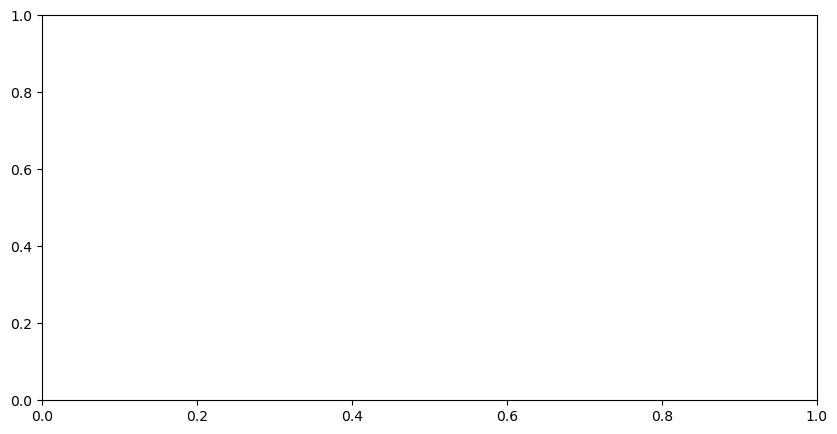

In [5]:
monthly_revenue = df.groupby('Month')['Revenue'].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_revenue, x='Month', y='Revenue', marker='o')
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

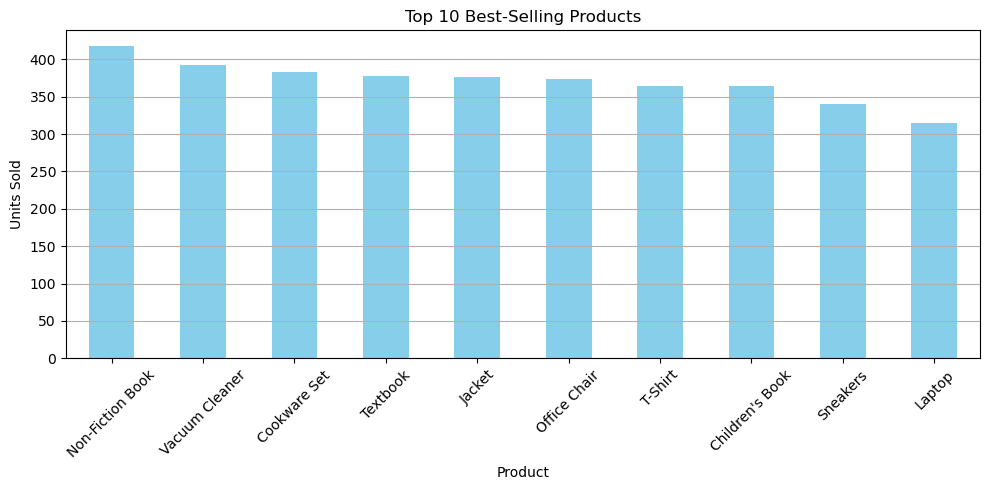

In [6]:
top_products = df.groupby('Product')['Units Sold'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title("Top 10 Best-Selling Products")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

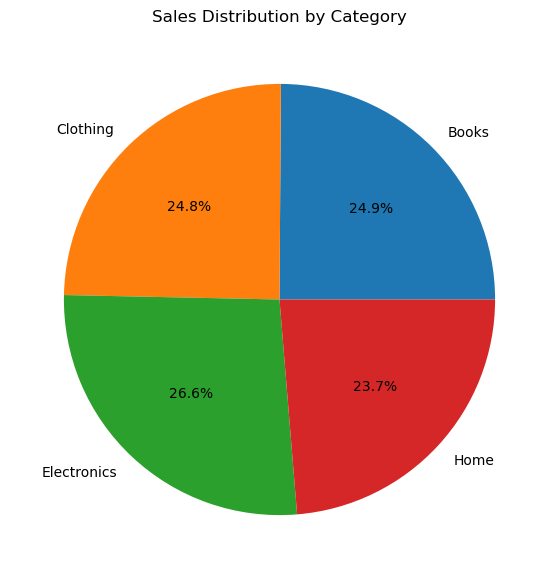

In [7]:
category_sales = df.groupby('Category')['Revenue'].sum()
category_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(7, 7))
plt.title("Sales Distribution by Category")
plt.ylabel("")
plt.show()

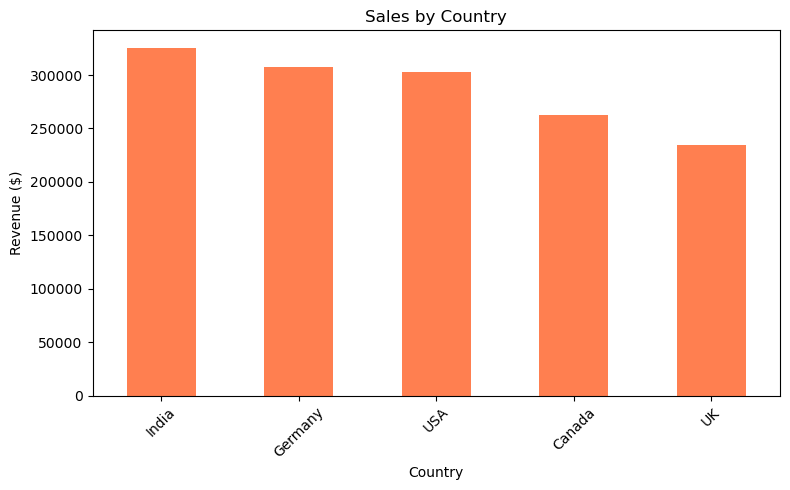

In [8]:
country_sales = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
country_sales.plot(kind='bar', color='coral', figsize=(8,5))
plt.title("Sales by Country")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

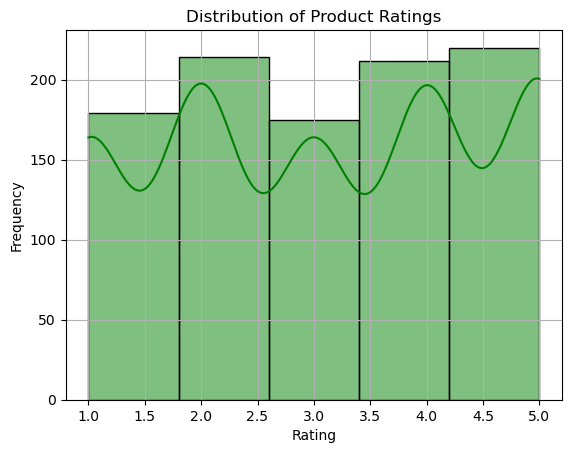

In [9]:
sns.histplot(df['Rating'], bins=5, kde=True, color='green')
plt.title("Distribution of Product Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## ✅ Key Insights
- Revenue peaked in certain months due to seasonal trends.
- Electronics and Home categories were top contributors.
- The USA led in revenue generation.
- Customer ratings are mostly between 3 and 5 stars.


## Tools Used
- Python, Pandas, Matplotlib, Seaborn
